# <center>Data Analysis and Processing</center>

## 3.2 Dataset Analysis
## 3.2.1 Popular Products and Frequent Reviewers ###

In [1]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer

# install nltk packages
nltk_downloader = nltk.downloader.Downloader()
if not nltk_downloader.is_installed('punkt'):
    nltk_downloader.download('punkt')
if not nltk_downloader.is_installed('averaged_perceptron_tagger'):
    nltk_downloader.download('averaged_perceptron_tagger')

plt.close('all')

**Open the json file and write the data to a list. Then convert the list to a pandas DataFrame.** 

In [2]:
# Create a list of all records

data_dir = './'
data_file = 'Office_Products.json'
all_reviews = []

with open(data_dir + data_file) as json_file:
    for j in json_file:
        x = json.loads(j)
        all_reviews.append(x)
        
# Convert list to DataFrame
df_all_reviews = pd.DataFrame(all_reviews)

In [3]:
print('Number of reviews = ',len(df_all_reviews),'\n')

# Inspect the first two rows
df_all_reviews.head(2)

Number of reviews =  5581313 



,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,3.0,6,False,"11 3, 2006",A2WJLOXXIB7NF3,0140503528,{'Format:': ' Hardcover'},Brandi D&#039;Angelo,"I thought the book was entertaining and cute, ...",Entertaining-but maybe not for young toddlers,1162512000,NaN
1,5.0,NaN,False,"05 9, 2006",A1RKICUK0GG6VF,0140503528,{'Format:': ' Hardcover'},Karen Mallory,This adorable story is an all time favorite fa...,adorable!,1147132800,NaN


In [4]:
df_date = df_all_reviews[['reviewTime']]
df_date.head(2)

,reviewTime
0,"11 3, 2006"
1,"05 9, 2006"


### The DataFrame **df_all_reviews** will be used in all sub-sections:   
**3.2.1** Popular Products and Frequent Reviewers   
**3.2.2** Sentence Segmentation   
**3.2.3** Tokenization and Stemming    
**3.2.4** POS Tagging  
**Each sub-section can be run independently.**

**Explore the data to determine:   
(1) Number of unique products,   
(2) Number of unique reviewers,  
(3) Distribution of number of reviews (by number of products),  
(4) Distribution of number of reviews (by number of reviewers)**

In [5]:
# (1) Create 2-column DataFrames: asin num_reviews
# For plotting review distribution histogram later

df_product_numreviews = df_all_reviews.asin.value_counts().reset_index()
df_product_numreviews.columns = ['asin', 'num_reviews']

print('Number of unique products = ',len(df_product_numreviews.asin),'\n')
df_product_numreviews.head(2)

Number of unique products =  306800 



,asin,num_reviews
0,B00006IEEV,14340
1,B00AE9V3WQ,11942


In [6]:
# (2) Create 2-column DataFrames from (1) for sanity check: num_reviews num_products

df_numreviews_numproducts = df_product_numreviews.num_reviews.value_counts().reset_index()
df_numreviews_numproducts.columns = ['num_reviews', 'num_products']

df_numreviews_numproducts

,num_reviews,num_products
0,1,119574
1,2,46938
2,3,25612
3,4,16386
4,5,11465
...,...,...
1384,1109,1
1385,1108,1
1386,413,1
1387,1102,1


In [7]:
# (3) Create 2 column DataFrames: reviewerID num_reviews
# For plotting review distribution histogram later

df_reviewer_numreviews = df_all_reviews.reviewerID.value_counts().reset_index()
df_reviewer_numreviews.columns = ['reviewerID', 'num_reviews']

print('Number of unique reviewers = ',len(df_reviewer_numreviews.reviewerID),'\n')
df_reviewer_numreviews.head(2)

Number of unique reviewers =  3404914 



,reviewerID,num_reviews
0,A3TTVIQ9RRHNIB,438
1,AC5HC2TJVWOFT,339


In [8]:
# (4) Create 2 column DataFrames from (3) for sanity check: num_reviews num_reviewers

df_numreviews_numreviewers = df_reviewer_numreviews.num_reviews.value_counts().reset_index()
df_numreviews_numreviewers.columns = ['num_reviews', 'num_reviewers']

df_numreviews_numreviewers

,num_reviews,num_reviewers
0,1,2435272
1,2,547605
2,3,193513
3,4,89786
4,5,47234
...,...,...
127,115,1
128,119,1
129,121,1
130,122,1


### Plot 1 - NUMBER OF PRODUCTS (y) against NUMBER OF REVIEWS (x)

In [9]:
# Just need a single column (num_reviews) to plot the distribution using a histogram 
# Remove the first columns in (2) and (4)

df_product_numreviews = df_product_numreviews[['num_reviews']]
df_reviewer_numreviews = df_reviewer_numreviews[['num_reviews']]

# SUMMARY STATISTICS
print('SUMMARY STATISTICS\n')
print('Max number of reviews (product) = ',max(df_product_numreviews['num_reviews']))
print('Min number of reviews (product) = ',min(df_product_numreviews['num_reviews']))
print('Mean number of reviews (product) = ',df_product_numreviews['num_reviews'].mean())
print('Median number of reviews (product) = ',df_product_numreviews['num_reviews'].median(),'\n')

print('Max number of reviews (reviewer) = ',max(df_reviewer_numreviews['num_reviews']))
print('Min number of reviews (reviewer) = ',min(df_reviewer_numreviews['num_reviews']))
print('Mean number of reviews (reviewer) = ',df_reviewer_numreviews['num_reviews'].mean())
print('Median number of reviews (reviewer) = ',df_reviewer_numreviews['num_reviews'].median())

SUMMARY STATISTICS

Max number of reviews (product) =  14340
Min number of reviews (product) =  1
Mean number of reviews (product) =  18.19202411994785
Median number of reviews (product) =  2.0 

Max number of reviews (reviewer) =  438
Min number of reviews (reviewer) =  1
Mean number of reviews (reviewer) =  1.6391935302918077
Median number of reviews (reviewer) =  1.0


**Plot histograms to show the reviews distribution by number of products:  
(1) Linear scale      
(2) log scale**

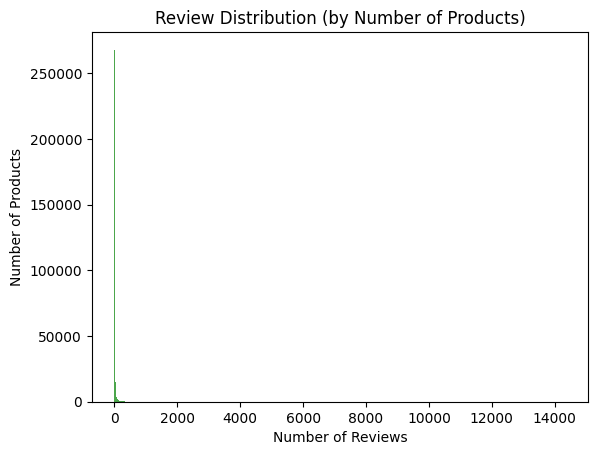

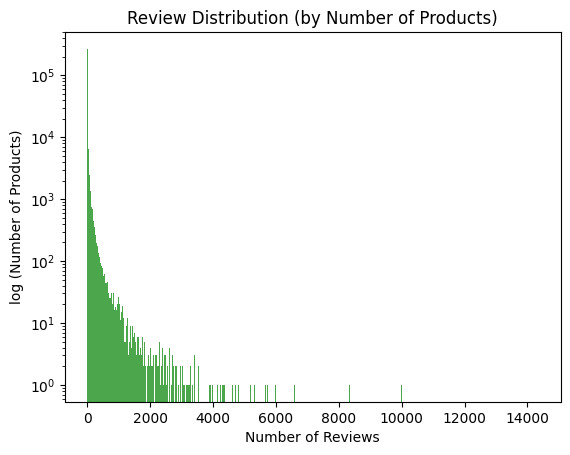

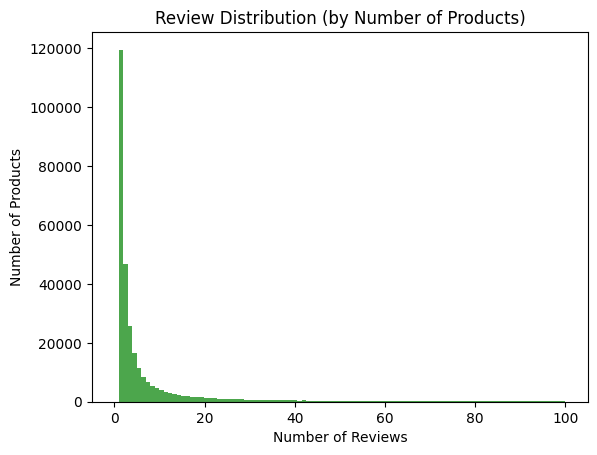

In [10]:
# Plot histogram for the range of num_reviews

# LINEAR SCALE
p1 = df_product_numreviews.plot.hist(alpha = 0.7, bins=836, color='g')
p1.set_xlabel('Number of Reviews')
p1.set_ylabel('Number of Products')
p1.set_title('Review Distribution (by Number of Products)')
p1.get_legend().remove()

# LOG SCALE
p2 = df_product_numreviews.plot.hist(alpha = 0.7, bins=836, log=True, color='g')
p2.set_xlabel('Number of Reviews')
p2.set_ylabel('log (Number of Products)')
p2.set_title('Review Distribution (by Number of Products)')
p2.get_legend().remove()

# LINEAR SCALE
p3 = df_product_numreviews.plot.hist(range = (0,100), alpha = 0.7, bins=101, color='g')
p3.set_xlabel('Number of Reviews')
p3.set_ylabel('Number of Products')
p3.set_title('Review Distribution (by Number of Products)')
p3.get_legend().remove()

plt.show()

### Plot 2 - NUMBER OF REVIEWERS (y) against NUMBER OF REVIEWS (x) 

**Plot histograms to show the reviews distribution by number of reviewers:  
(1) Linear scale     
(2) log scale**

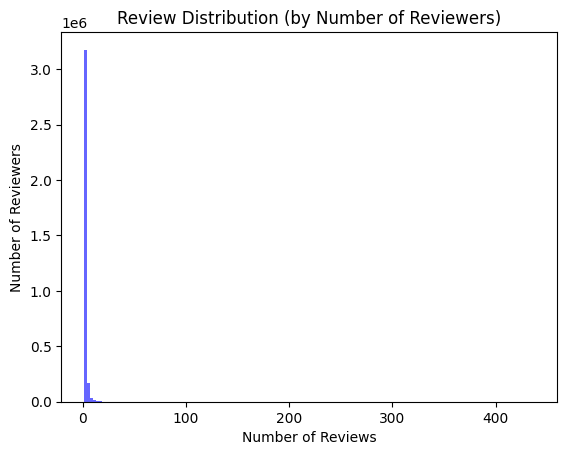

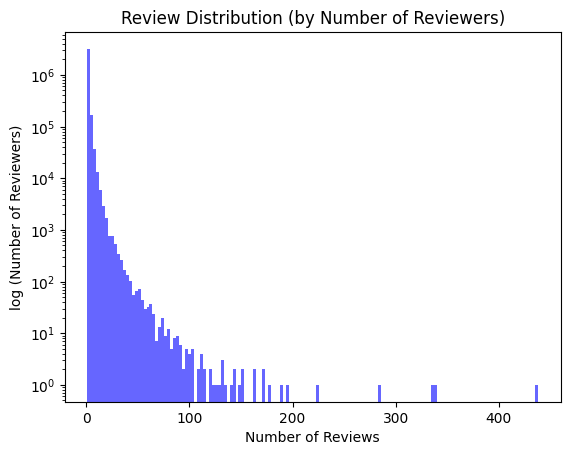

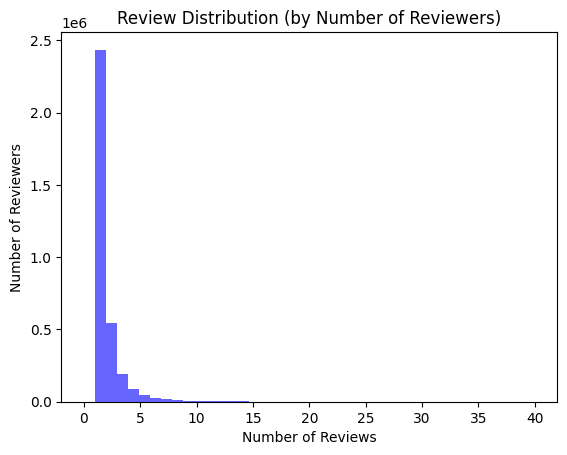

In [11]:
# Plot histogram for the range of num_reviews

# LINEAR SCALE
r1 = df_reviewer_numreviews.plot.hist(alpha = 0.6, bins=152, color='b')
r1.set_xlabel('Number of Reviews')
r1.set_ylabel('Number of Reviewers')
r1.set_title('Review Distribution (by Number of Reviewers)')
r1.get_legend().remove()

# LOG SCALE
r2 = df_reviewer_numreviews.plot.hist(alpha = 0.6, bins=152, log=True, color='b')
r2.set_xlabel('Number of Reviews')
r2.set_ylabel('log (Number of Reviewers)')
r2.set_title('Review Distribution (by Number of Reviewers)')
r2.get_legend().remove()

# LINEAR SCALE
r3 = df_reviewer_numreviews.plot.hist(range = (0,40), alpha = 0.6, bins=41, color='b')
r3.set_xlabel('Number of Reviews')
r3.set_ylabel('Number of Reviewers')
r3.set_title('Review Distribution (by Number of Reviewers)')
r3.get_legend().remove()

plt.show()

### Plot 3 - One plot for each group of reviewers: most active, active, average, not very active, not active.   
**Set criteria for reviewer activity levels (based on average number of reviews over 10 years 2005 to 2014 (2001 to 2004 not counted)**   
**MOST ACTIVE:**     more than 6 reviews/year = 61 to 152 total reviews      
**ACTIVE:**          3 to 6 reviews/year =  31 to 60 total reviews   
**AVERAGE:**         2 to 3 reviews/year = 21 to 30 total reviews    
**NOT VERY ACTIVE:** 1 to 2 reviews/year = 10 to 20 total reviews           
**NOT ACTIVE:**      less than 1 review/year = 1 to 9 total reviews  

**Plot the reviews distribution for each group of reviewers.  
For 'Not Active' reviewers: plot (1) linear scale (2) log scale**

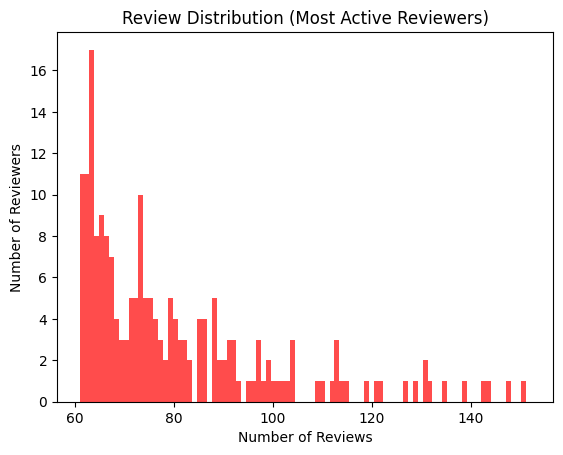

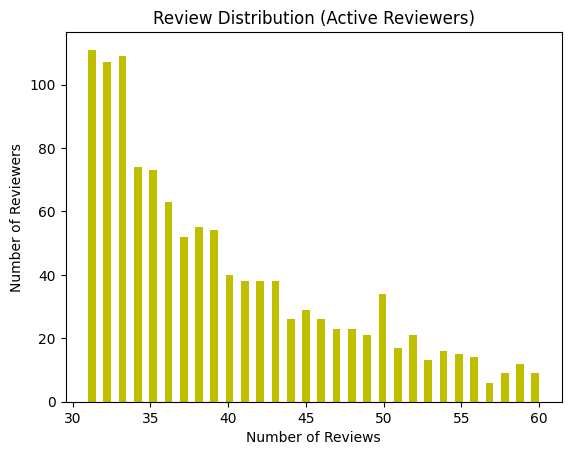

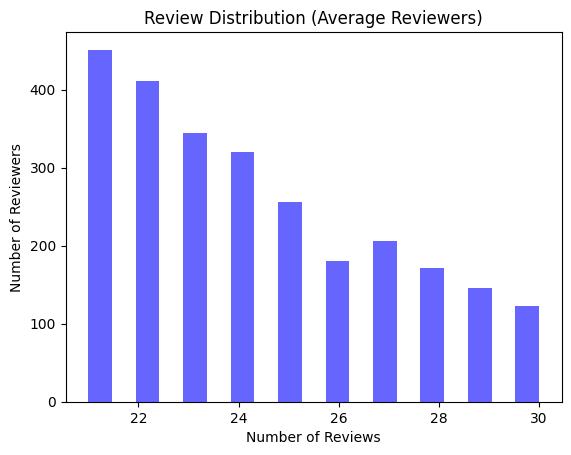

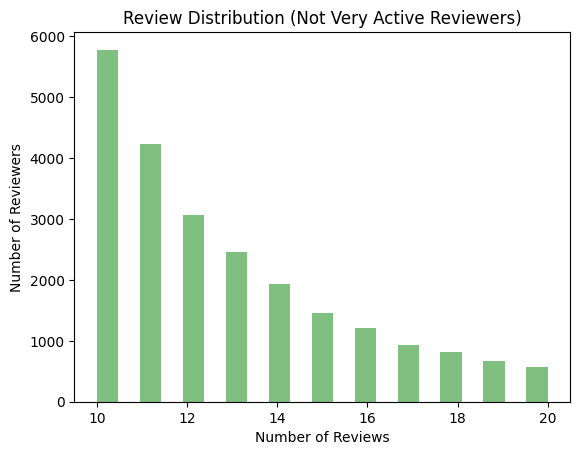

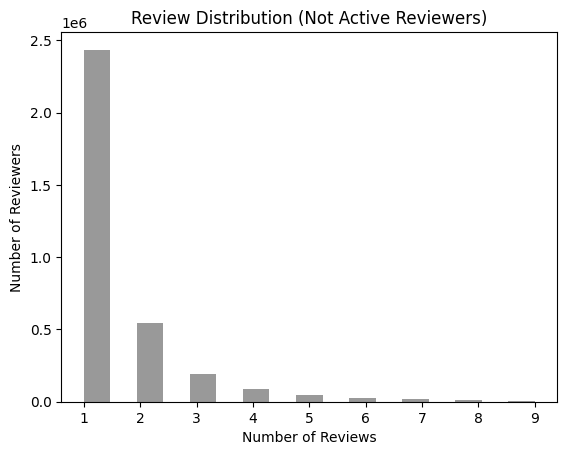

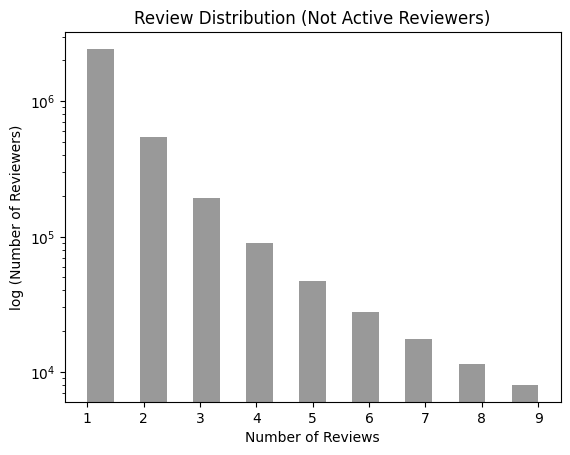

In [12]:
most = df_reviewer_numreviews.plot.hist(range=[61,152], alpha = 0.7, bins=92, color='r')
most.set_xlabel('Number of Reviews')
most.set_ylabel('Number of Reviewers')
most.set_title('Review Distribution (Most Active Reviewers)')
most.get_legend().remove()

above = df_reviewer_numreviews.plot.hist(range=[31,60], alpha = 1.0, bins=59, color='y')
above.set_xlabel('Number of Reviews')
above.set_ylabel('Number of Reviewers')
above.set_title('Review Distribution (Active Reviewers)')
above.get_legend().remove()

average = df_reviewer_numreviews.plot.hist(range=[21,30], alpha = 0.6, bins=19, color='b')
average.set_xlabel('Number of Reviews')
average.set_ylabel('Number of Reviewers')
average.set_title('Review Distribution (Average Reviewers)')
average.get_legend().remove()

below = df_reviewer_numreviews.plot.hist(range=[10,20], alpha = 0.5, bins=21, color='g')
below.set_xlabel('Number of Reviews')
below.set_ylabel('Number of Reviewers')
below.set_title('Review Distribution (Not Very Active Reviewers)')
below.get_legend().remove()

# LINEAR SCALE
least = df_reviewer_numreviews.plot.hist(range=[1,9], alpha = 0.8, bins=17, color='grey')
least.set_xlabel('Number of Reviews')
least.set_ylabel('Number of Reviewers')
least.set_title('Review Distribution (Not Active Reviewers)')
least.get_legend().remove()

# LOG SCALE
least = df_reviewer_numreviews.plot.hist(range=[1,9], alpha = 0.8, bins=17, log = True, color='grey')
least.set_xlabel('Number of Reviews')
least.set_ylabel('log (Number of Reviewers)')
least.set_title('Review Distribution (Not Active Reviewers)')
least.get_legend().remove()

plt.show()

## Plot 4 - For each group of reviewers, plot the rating (1.0 to 5.0) distribution.

**Create a DataFrame with these columns - reviewerID, overall, num_reviews.**

In [13]:
# (5) Re-create 2-column DataFrames previously created in (3): reviewerID num_reviews

df_reviewer_numreviews = df_all_reviews.reviewerID.value_counts().reset_index()
df_reviewer_numreviews.columns = ['reviewerID', 'num_reviews']
df_reviewer_numreviews.head(2)

,reviewerID,num_reviews
0,A3TTVIQ9RRHNIB,438
1,AC5HC2TJVWOFT,339


In [14]:
# (6) Create 2-column DataFrame: reviewerID overall

df_reviewer_rating = df_all_reviews[['reviewerID','overall']]
df_reviewer_rating.head(2)

,reviewerID,overall
0,A2WJLOXXIB7NF3,3.0
1,A1RKICUK0GG6VF,5.0


In [15]:
# (7) Merge (5) and (6) to get 3-column DataFrame: reviewerID overall num_reviews

df_reviewer_rating_numreviews = pd.merge(df_reviewer_rating, df_reviewer_numreviews, on = 'reviewerID')
df_reviewer_rating_numreviews.head(2)

,reviewerID,overall,num_reviews
0,A2WJLOXXIB7NF3,3.0,1
1,A1RKICUK0GG6VF,5.0,1


**CRITERIA**   
**MOST ACTIVE:**     more than 6 reviews/year = 61 to 152 total reviews      
**ACTIVE:**          3 to 6 reviews/year =  31 to 60 total reviews   
**AVERAGE:**         2 to 3 reviews/year = 21 to 30 total reviews    
**NOT VERY ACTIVE:** 1 to 2 reviews/year = 10 to 20 total reviews           
**NOT ACTIVE:**      less than 1 review/year = 1 to 9 total reviews  

**Partition the DataFrame into the five groups of reviewers.**

In [16]:
# Partition (7) into 5 DataFrames, one for each group of reviewers (most, above, average, below, least) 

df = df_reviewer_rating_numreviews

df_rating_most = df.loc[(df['num_reviews']>=61) & (df['num_reviews']<=152)]
df_rating_above = df.loc[(df['num_reviews']>=31) & (df['num_reviews']<=60)]
df_rating_average = df.loc[(df['num_reviews']>=21) & (df['num_reviews']<=30)]
df_rating_below = df.loc[(df['num_reviews']>=10) & (df['num_reviews']<=20)]
df_rating_least = df.loc[(df['num_reviews']>=1) & (df['num_reviews']<=9)]

print('NUMBER OF REVIEWS \n')
print('Very active: ', len(df_rating_most))
print('Active: ', len(df_rating_above))
print('Average: ', len(df_rating_average))
print('Not very active: ', len(df_rating_below))
print('Not active: ', len(df_rating_least)) 

NUMBER OF REVIEWS 

Very active:  15849
Active:  46101
Average:  63459
Not very active:  295973
Not active:  5156921


**Create the ratings distribution for each group of reviewers.**

In [17]:
# For each group of reviewers, create a 1-column DataFrame: overall

df_rating_most = df_rating_most[['overall']]
df_rating_above = df_rating_above[['overall']]
df_rating_average = df_rating_average[['overall']]
df_rating_below = df_rating_below[['overall']]
df_rating_least = df_rating_least[['overall']]

# Sanity check
print(df_rating_most.head(2))
print(df_rating_above.head(2))
print(df_rating_average.head(2))
print(df_rating_below.head(2))
print(df_rating_least.head(2))

      overall
809       5.0
2476      5.0
      overall
677       5.0
1027      5.0
     overall
285      5.0
341      5.0
    overall
32      5.0
65      5.0
   overall
0      3.0
1      5.0


In [18]:
# (8) For each DataFrame, create a DataFrame for number of reviews per rating 

df_rating_numreviews_most = df_rating_most.overall.value_counts().reset_index()
df_rating_numreviews_most.columns = ['rating', 'num_reviews']

df_rating_numreviews_above = df_rating_above.overall.value_counts().reset_index()
df_rating_numreviews_above.columns = ['rating', 'num_reviews']

df_rating_numreviews_average = df_rating_average.overall.value_counts().reset_index()
df_rating_numreviews_average.columns = ['rating', 'num_reviews']

df_rating_numreviews_below = df_rating_below.overall.value_counts().reset_index()
df_rating_numreviews_below.columns = ['rating', 'num_reviews']

df_rating_numreviews_least = df_rating_least.overall.value_counts().reset_index()
df_rating_numreviews_least.columns = ['rating', 'num_reviews']

print('RATINGS DISTRIBUTION \n')
print('Most Active')
print(df_rating_numreviews_most)
print('Active')
print(df_rating_numreviews_above)
print('Average')
print(df_rating_numreviews_average)
print('Not Very Active')
print(df_rating_numreviews_below)
print('Not Active')
print(df_rating_numreviews_least)

RATINGS DISTRIBUTION 

Most Active
   rating  num_reviews
0     5.0        10917
1     4.0         3190
2     3.0         1111
3     2.0          353
4     1.0          278
Active
   rating  num_reviews
0     5.0        32513
1     4.0         8373
2     3.0         3016
3     1.0         1131
4     2.0         1068
Average
   rating  num_reviews
0     5.0        45103
1     4.0        10678
2     3.0         4113
3     1.0         1909
4     2.0         1656
Not Very Active
   rating  num_reviews
0     5.0       213558
1     4.0        44659
2     3.0        18286
3     1.0        10897
4     2.0         8573
Not Active
   rating  num_reviews
0     5.0      3292185
1     4.0       706845
2     1.0       549498
3     3.0       354397
4     2.0       253996


**Use lists for easy plotting of bar plots.**

In [19]:
# First, convert the DataFrame column 'num_reviews' in (8) to Lists, sorted by ratings from 1.0 to 5.0
# To use pandas plot() 

rating_numreviews_most = df_rating_numreviews_most.sort_values(['rating'])['num_reviews'].tolist()
rating_numreviews_above = df_rating_numreviews_above.sort_values(['rating'])['num_reviews'].tolist()
rating_numreviews_average = df_rating_numreviews_average.sort_values(['rating'])['num_reviews'].tolist()
rating_numreviews_below = df_rating_numreviews_below.sort_values(['rating'])['num_reviews'].tolist()
rating_numreviews_least = df_rating_numreviews_least.sort_values(['rating'])['num_reviews'].tolist()

# Sanity check
print(rating_numreviews_most)
print(rating_numreviews_above)
print(rating_numreviews_average)
print(rating_numreviews_below)
print(rating_numreviews_least)

[278, 353, 1111, 3190, 10917]
[1131, 1068, 3016, 8373, 32513]
[1909, 1656, 4113, 10678, 45103]
[10897, 8573, 18286, 44659, 213558]
[549498, 253996, 354397, 706845, 3292185]


**Plot the ratings distributions**

Text(0.5, 1.0, 'Rating Distribution (Most Active Reviewers)')

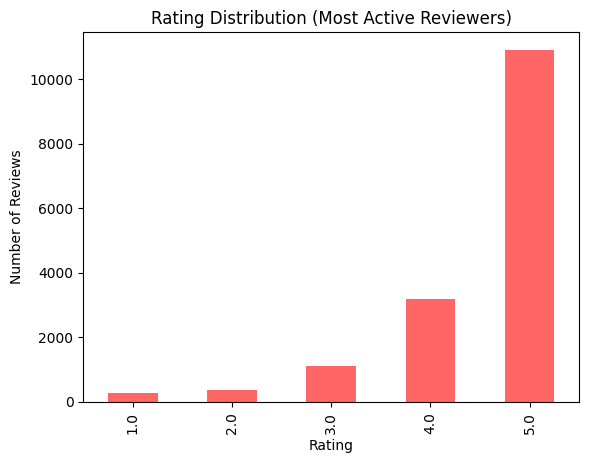

In [20]:
# Then convert the list to a Series, and plot the Series

# x-axis labels
rating = ['1.0', '2.0', '3.0', '4.0', '5.0']

most = pd.Series(rating_numreviews_most, rating).plot(kind='bar', alpha = 0.6,color='r')
most.set_xlabel('Rating')
most.set_ylabel('Number of Reviews')
most.set_title('Rating Distribution (Most Active Reviewers)')

Text(0.5, 1.0, 'Rating Distribution (Active Reviewers)')

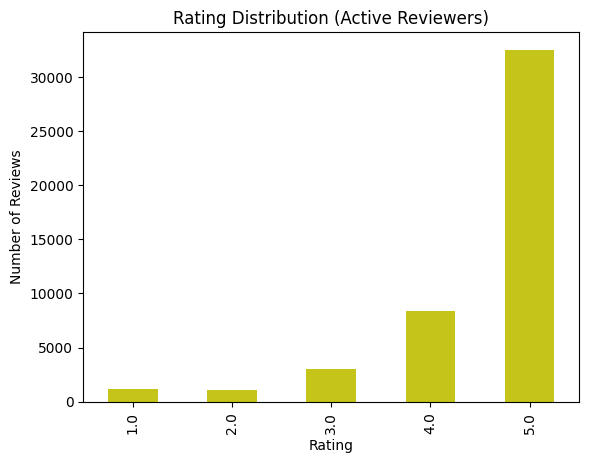

In [21]:
above = pd.Series(rating_numreviews_above, rating).plot(kind='bar', alpha = 0.9, color='y')
above.set_xlabel('Rating')
above.set_ylabel('Number of Reviews')
above.set_title('Rating Distribution (Active Reviewers)')

Text(0.5, 1.0, 'Rating Distribution (Average Reviewers)')

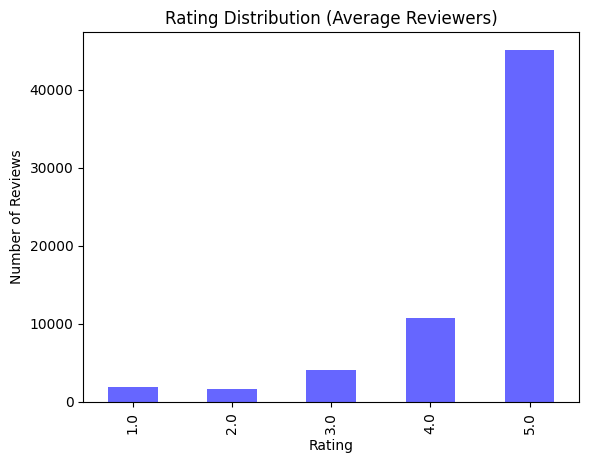

In [22]:
average = pd.Series(rating_numreviews_average, rating).plot(kind='bar', alpha = 0.6,color='b')
average.set_xlabel('Rating')
average.set_ylabel('Number of Reviews')
average.set_title('Rating Distribution (Average Reviewers)')

Text(0.5, 1.0, 'Rating Distribution (Not Very Active Reviewers)')

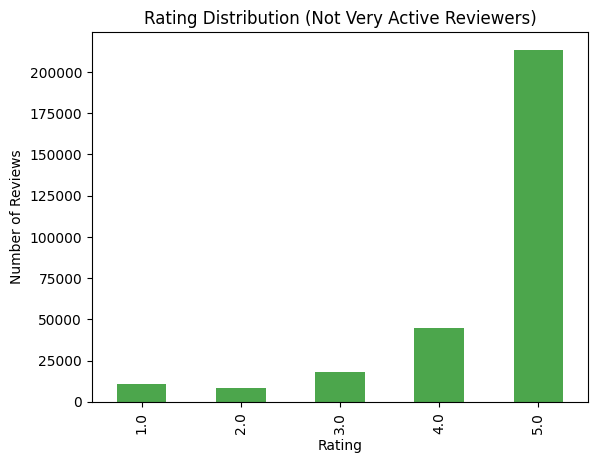

In [23]:
below = pd.Series(rating_numreviews_below, rating).plot(kind='bar', alpha = 0.7,color='g')
below.set_xlabel('Rating')
below.set_ylabel('Number of Reviews')
below.set_title('Rating Distribution (Not Very Active Reviewers)')

Text(0.5, 1.0, 'Rating Distribution (Not Active Reviewers)')

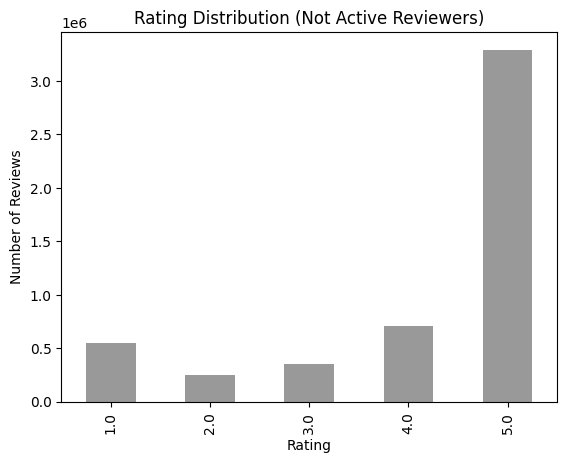

In [24]:
least = pd.Series(rating_numreviews_least, rating).plot(kind='bar', alpha = 0.8, color='grey')
least.set_xlabel('Rating')
least.set_ylabel('Number of Reviews')
least.set_title('Rating Distribution (Not Active Reviewers)')

## 3.2.2 Sentence Segmentation
### Plot 5 - NUMBER OF REVIEWS (y) against LENGTH OF REVIEW by SENTENCE (x) 

**For each review, tokenize the text (by sentences) and count the number of sentences.**

In [25]:
# Create a 3-column DataFrame: reviewText tokenized_sentences num_sentences
# The last two columns are blank

df_review_sentence = df_all_reviews[['reviewText']]
df_review_sentence.loc[:,'tokenized_sentences'] = ""
df_review_sentence.loc[:,'tokenized_sentences'] = np.nan
df_review_sentence.loc[:,'num_sentences'] = ""
df_review_sentence.loc[:,'num_sentences'] = np.nan

/var/folders/tr/kxdyv4b52sj7yfvtgfyh4npw0000gq/T/ipykernel_23202/4108236145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_sentence.loc[:,'tokenized_sentences'] = ""
/var/folders/tr/kxdyv4b52sj7yfvtgfyh4npw0000gq/T/ipykernel_23202/4108236145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_sentence.loc[:,'num_sentences'] = ""


In [26]:
df_review_sentence.head(2)

,reviewText,tokenized_sentences,num_sentences
0,"I thought the book was entertaining and cute, ...",NaN,NaN
1,This adorable story is an all time favorite fa...,NaN,NaN


In [28]:


# Safe tokenizer that skips NaN or non-strings
def safe_sent_tokenize(text):
    if isinstance(text, str):
        return sent_tokenize(text)
    return []

# Apply the safe tokenizer
df_review_sentence['tokenized_sentences'] = df_review_sentence['reviewText'].apply(safe_sent_tokenize)

# Count number of sentences
df_review_sentence['num_sentences'] = df_review_sentence['tokenized_sentences'].apply(len)


/var/folders/tr/kxdyv4b52sj7yfvtgfyh4npw0000gq/T/ipykernel_23202/2758068488.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_sentence['tokenized_sentences'] = df_review_sentence['reviewText'].apply(safe_sent_tokenize)
/var/folders/tr/kxdyv4b52sj7yfvtgfyh4npw0000gq/T/ipykernel_23202/2758068488.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_sentence['num_sentences'] = df_review_sentence['tokenized_sentences'].apply(len)


In [29]:
df_review_sentence.head(3)

,reviewText,tokenized_sentences,num_sentences
0,"I thought the book was entertaining and cute, ...","[I thought the book was entertaining and cute,...",5
1,This adorable story is an all time favorite fa...,[This adorable story is an all time favorite f...,2
2,Lisa's bear Corduroy gets lost in the laundrom...,[Lisa's bear Corduroy gets lost in the laundro...,4


In [30]:
# Create 1-column DataFrame for plotting histogram: num_sentences

df_numsentences = df_review_sentence[['num_sentences']]
df_numsentences.head(3)

,num_sentences
0,5
1,2
2,4


**Get summary statistics for the number of sentences.**

In [31]:
# SUMMARY STATISTICS

print('SUMMARY STATISTICS FOR LENGTHS OF REVIEWS \n')

print('Max number of sentences = ',max(df_numsentences['num_sentences']))
print('Min number of sentences = ',min(df_numsentences['num_sentences']),'\n')
print('Mean number of sentences = ',df_numsentences['num_sentences'].mean())
print('Median number of sentences = ',df_numsentences['num_sentences'].median())

SUMMARY STATISTICS FOR LENGTHS OF REVIEWS 

Max number of sentences =  370
Min number of sentences =  0 

Mean number of sentences =  3.1266580104000616
Median number of sentences =  2.0


**Plot the distribution of review lengths (by number of sentences):  
(1) Linear scale  
(2) log scale**

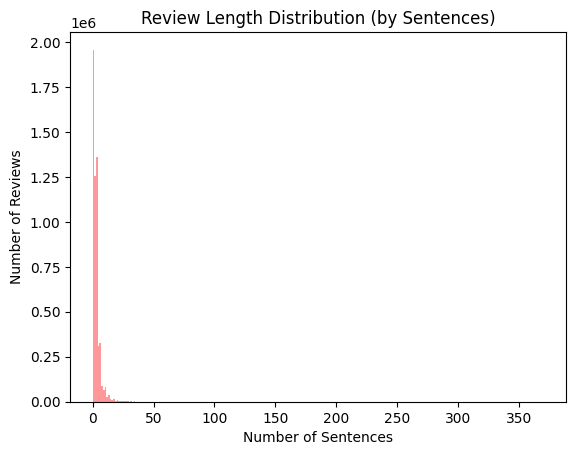

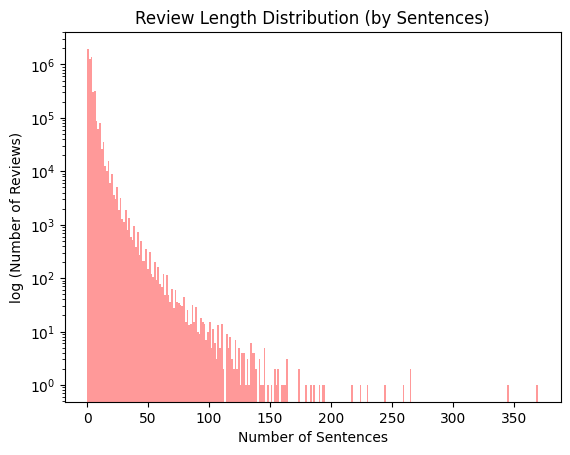

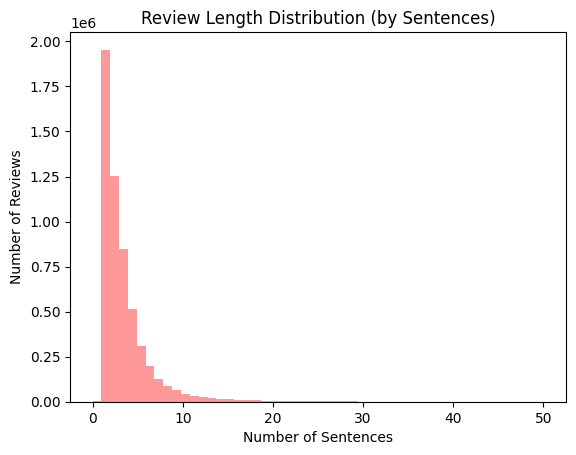

In [32]:
# LINEAR SCALE
s1 = df_numsentences.plot.hist(alpha = 0.4, bins=263, color='r')
s1.set_xlabel('Number of Sentences')
s1.set_ylabel('Number of Reviews')
s1.set_title('Review Length Distribution (by Sentences)')
s1.get_legend().remove()

# LOG SCALE
s2 = df_numsentences.plot.hist(alpha = 0.4, bins=263, log = True, color='r')
s2.set_xlabel('Number of Sentences')
s2.set_ylabel('log (Number of Reviews)')
s2.set_title('Review Length Distribution (by Sentences)')
s2.get_legend().remove()

# LINEAR SCALE
s3 = df_numsentences.plot.hist(range = (0,50), alpha = 0.4, bins=51, color='r')
s3.set_xlabel('Number of Sentences')
s3.set_ylabel('Number of Reviews')
s3.set_title('Review Length Distribution (by Sentences)')
s3.get_legend().remove()

plt.show()

## 3.2.3 Tokenization and Stemming
### Plot 6 (no stemming) NUMBER OF REVIEWS (y) against LENGTH OF REVIEW by TOKENS (x) 

**For each review:   
(1) Tokenize the review (by word)   
(2) Convert tokens to lowercase   
(3) Stem the tokens   
(4) Select only alphabetic whole and stemmed tokens   
(5) Count the number of whole and stemmed tokens**

In [33]:
# Create a 3-column DataFrame: reviewText num_tokens_whole num_tokens_stemmed
# The last two columns are blank

df_review_word = df_all_reviews[['reviewText']]

# to store unique whole tokens
df_review_word.loc[:,'num_tokens_whole'] = ""
df_review_word.loc[:,'num_tokens_whole'] = np.nan

# to store unique stemmed tokens
df_review_word.loc[:,'num_tokens_stemmed'] = ""
df_review_word.loc[:,'num_tokens_stemmed'] = np.nan

/var/folders/tr/kxdyv4b52sj7yfvtgfyh4npw0000gq/T/ipykernel_23202/2862974123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_word.loc[:,'num_tokens_whole'] = ""
/var/folders/tr/kxdyv4b52sj7yfvtgfyh4npw0000gq/T/ipykernel_23202/2862974123.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_word.loc[:,'num_tokens_stemmed'] = ""


In [34]:
df_review_word.head(2)

,reviewText,num_tokens_whole,num_tokens_stemmed
0,"I thought the book was entertaining and cute, ...",NaN,NaN
1,This adorable story is an all time favorite fa...,NaN,NaN


In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def process_review(text):
    if not isinstance(text, str):
        return pd.Series([0, 0])

    # Tokenize and lowercase
    tokens = word_tokenize(text)
    tokens_lower = [w.lower() for w in tokens if w.isalpha()]

    # Whole word tokens (alpha-only)
    unique_whole = set(tokens_lower)

    # Stemmed tokens
    stemmed_tokens = [ps.stem(w) for w in tokens_lower]
    unique_stemmed = set(stemmed_tokens)

    return pd.Series([len(unique_whole), len(unique_stemmed)])

df_review_word[['num_tokens_whole', 'num_tokens_stemmed']] = df_review_word['reviewText'].apply(process_review)


/var/folders/tr/kxdyv4b52sj7yfvtgfyh4npw0000gq/T/ipykernel_23202/3099186798.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_word[['num_tokens_whole', 'num_tokens_stemmed']] = df_review_word['reviewText'].apply(process_review)


In [36]:
# Create 1-column DataFrames for plots

df_tokens_whole = df_review_word[['num_tokens_whole']]
df_tokens_stemmed = df_review_word[['num_tokens_stemmed']]

In [37]:
# CHECK
df_tokens_whole.head(5)

,num_tokens_whole
0,61
1,27
2,29
3,115
4,265


In [38]:
# CHECK that num_tokens_stemmed <= num_tokens_whole 
df_tokens_stemmed.head(5)

,num_tokens_stemmed
0,61
1,27
2,29
3,113
4,241


In [39]:
# SUMMARY STATISTICS

print('SUMMARY STATISTICS FOR LENGTHS OF REVIEWS\n')
print('Max number of whole tokens = ',max(df_tokens_whole['num_tokens_whole']))
print('Min number of whole tokens = ',min(df_tokens_whole['num_tokens_whole']),'\n')

print('Max number of stemmed tokens = ',max(df_tokens_stemmed['num_tokens_stemmed']))
print('Min number of stemmed tokens = ',min(df_tokens_stemmed['num_tokens_stemmed']),'\n')

print('Mean number of whole tokens = ',df_tokens_whole['num_tokens_whole'].mean())
print('Median number of whole tokens = ',df_tokens_whole['num_tokens_whole'].median(),'\n')

print('Mean number of stemmed tokens = ',df_tokens_stemmed['num_tokens_stemmed'].mean())
print('Median number of stemmed tokens = ',df_tokens_stemmed['num_tokens_stemmed'].median())

SUMMARY STATISTICS FOR LENGTHS OF REVIEWS

Max number of whole tokens =  1226
Min number of whole tokens =  0 

Max number of stemmed tokens =  1024
Min number of stemmed tokens =  0 

Mean number of whole tokens =  26.942426629719566
Median number of whole tokens =  18.0 

Mean number of stemmed tokens =  26.348478216505686
Median number of stemmed tokens =  18.0


### Plot 6 NUMBER OF REVIEWS (y) against LENGTH OF REVIEW by WHOLE TOKENS (x) 

**Plot the distribution of review lengths (by number of whole tokens):  
(1) Linear scale    
(2) log scale**

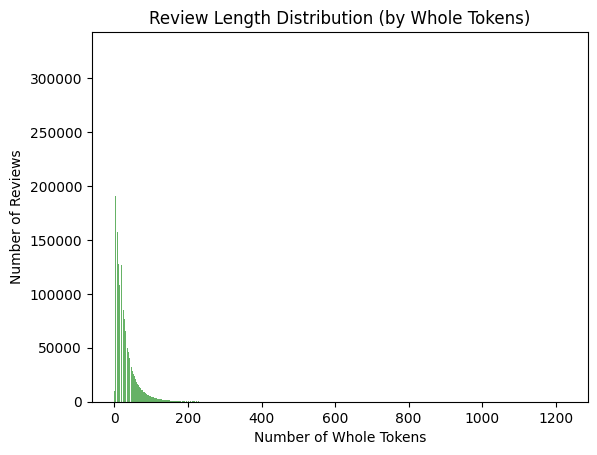

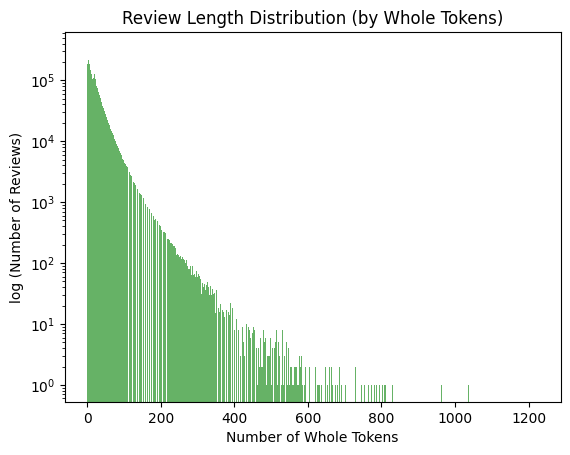

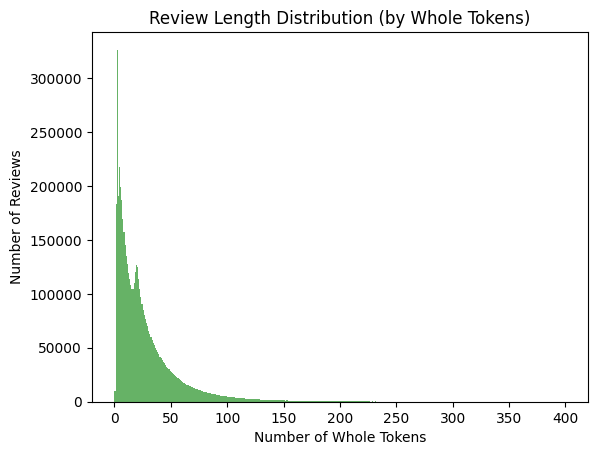

In [40]:
# LINEAR SCALE
wt1 = df_tokens_whole.plot.hist(alpha = 0.6, bins=1454, color='g')
wt1.set_xlabel('Number of Whole Tokens')
wt1.set_ylabel('Number of Reviews')
wt1.set_title('Review Length Distribution (by Whole Tokens)')
wt1.get_legend().remove()

# LOG SCALE
wt2 = df_tokens_whole.plot.hist(alpha = 0.6, bins=1454, log=True, color='g')
wt2.set_xlabel('Number of Whole Tokens')
wt2.set_ylabel('log (Number of Reviews)')
wt2.set_title('Review Length Distribution (by Whole Tokens)')
wt2.get_legend().remove()

# LINEAR SCALE
wt3 = df_tokens_whole.plot.hist(range = (0,400), alpha = 0.6, bins=401, color='g')
wt3.set_xlabel('Number of Whole Tokens')
wt3.set_ylabel('Number of Reviews')
wt3.set_title('Review Length Distribution (by Whole Tokens)')
wt3.get_legend().remove()

plt.show()

### Plot 7 NUMBER OF REVIEWS (y) against LENGTH OF REVIEW by STEMMED TOKENS (x) 

**Plot the distribution of review lengths (by number of stemmed tokens):   
(1) Linear scale    
(2) log scale**

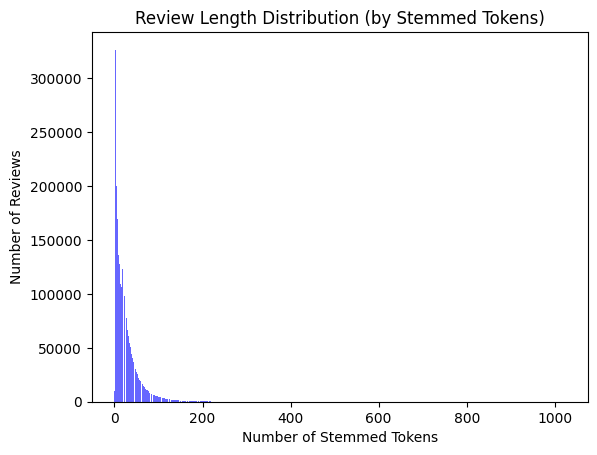

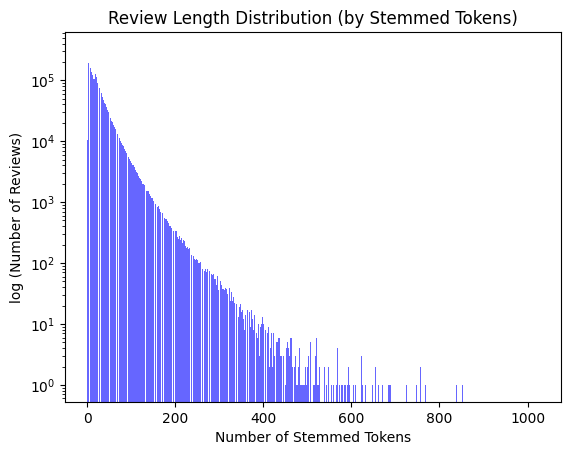

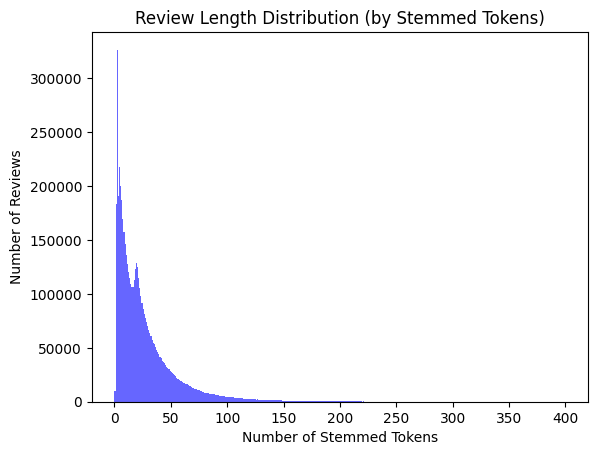

In [41]:
# LINEAR SCALE
st1 = df_tokens_stemmed.plot.hist(alpha = 0.6, bins=1225, color='b')
st1.set_xlabel('Number of Stemmed Tokens')
st1.set_ylabel('Number of Reviews')
st1.set_title('Review Length Distribution (by Stemmed Tokens)')
st1.get_legend().remove()

# LOG SCALE
st2 = df_tokens_stemmed.plot.hist(alpha = 0.6, bins=1225, log=True, color='b')
st2.set_xlabel('Number of Stemmed Tokens')
st2.set_ylabel('log (Number of Reviews)')
st2.set_title('Review Length Distribution (by Stemmed Tokens)')
st2.get_legend().remove()

# LINEAR SCALE
st3 = df_tokens_stemmed.plot.hist(range = (0,400), alpha = 0.6, bins=401, color='b')
st3.set_xlabel('Number of Stemmed Tokens')
st3.set_ylabel('Number of Reviews')
st3.set_title('Review Length Distribution (by Stemmed Tokens)')
st3.get_legend().remove()

plt.show()

## 3.2.4 POS Tagging 
**Select 5 random reviews and apply POS tagging to the first sentence of each review.**

In [42]:
# Select 5 random reviews

random.seed(22)
reviews = random.sample(range(len(df_all_reviews)),5)
print(reviews)

[1177497, 2035219, 198106, 5142945, 3750827]


In [43]:
# Get these 5 random reviews

reviews_random = []
for i in reviews:
    reviews_random.append(df_all_reviews.loc[i,'reviewText'])
    print(df_all_reviews.loc[i,'reviewText'],'\n')

Very strong and sturdy - Great for my shipping needs (1 ounce boston round bottles) 

Thank you 

I have been on the hunt for a classic manual embossing label maker and this one of everything I could ask for! Very easy to use and the labels are strong with great adhesive! 

Amazing! 

Thin, yes, but still a nice amount of protection.  I am not a dropper so this works perfect for me.  Beautiful as well,  I keep turning my phone on to its face so that this design is on top so I can admire it over and over. 



In [44]:
# Sentence tokenize these 5 reviews, get the first sentence of each review
# Note that: 1st sentence - good grammar. 2nd, 3rd - poor grammar and punctuation.
# 4th - good grammar. 5th - good grammar except 'cannot' is separated to two words

tokens = []
sentences_random = []

for j, review in enumerate(reviews_random):
    tokens.append(sent_tokenize(review))
    sentences_random.append(tokens[j][0])
    print(sentences_random[j])

Very strong and sturdy - Great for my shipping needs (1 ounce boston round bottles)
Thank you
I have been on the hunt for a classic manual embossing label maker and this one of everything I could ask for!
Amazing!
Thin, yes, but still a nice amount of protection.


In [47]:
# Apply POS tagging

tokens = []
for k, sentence in enumerate(sentences_random):
    tokens = word_tokenize(sentence)
    print(nltk.pos_tag(tokens),'\n')

[('Very', 'RB'), ('strong', 'JJ'), ('and', 'CC'), ('sturdy', 'JJ'), ('-', ':'), ('Great', 'NN'), ('for', 'IN'), ('my', 'PRP$'), ('shipping', 'NN'), ('needs', 'NNS'), ('(', '('), ('1', 'CD'), ('ounce', 'NN'), ('boston', 'NN'), ('round', 'NN'), ('bottles', 'NNS'), (')', ')')] 

[('Thank', 'NN'), ('you', 'PRP')] 

[('I', 'PRP'), ('have', 'VBP'), ('been', 'VBN'), ('on', 'IN'), ('the', 'DT'), ('hunt', 'NN'), ('for', 'IN'), ('a', 'DT'), ('classic', 'JJ'), ('manual', 'JJ'), ('embossing', 'NN'), ('label', 'NN'), ('maker', 'NN'), ('and', 'CC'), ('this', 'DT'), ('one', 'CD'), ('of', 'IN'), ('everything', 'NN'), ('I', 'PRP'), ('could', 'MD'), ('ask', 'VB'), ('for', 'IN'), ('!', '.')] 

[('Amazing', 'NN'), ('!', '.')] 

[('Thin', 'NNP'), (',', ','), ('yes', 'UH'), (',', ','), ('but', 'CC'), ('still', 'RB'), ('a', 'DT'), ('nice', 'JJ'), ('amount', 'NN'), ('of', 'IN'), ('protection', 'NN'), ('.', '.')] 

